In [3]:
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy import *
from numpy import *
import neuron
import pyNN
from pyNN import neuron
from pyNN.standardmodels import electrodes, build_translations, StandardCurrentSource
from pyNN.parameters import ParameterSpace, Sequence
from pyNN.neuron import simulator
from pyNN.utility import get_simulator, normalized_filename
from pyNN.utility.plotting import Figure, Panel
from neuron import h
from quantities import mV
%matplotlib inline

In [4]:
dir(pyNN)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'common',
 'connectors',
 'core',
 'descriptions',
 'errors',
 'models',
 'neuron',
 'parameters',
 'random',
 'recording',
 'space',
 'standardmodels',
 'utility']

In [5]:
from pyNN import neuron

In [10]:
camp = linspace(-100, 300, 20)
vamp = linspace(-40, -100, 12)
cell = neuron.Population(20)
for cell_id in arange(0,19):
    cell = neuron.IF_curr_exp(v_thresh = vamp[cell_id], tau_refrac = 5.0, tau_m = 10.0)
    for vamp_id in arange(-40,-100):
        pulse = neuron.DCSource(amplitude = camp[vamp_id], start = 10.0, stop = 60.0)
        cell[cell_id].inject(pulse)

TypeError: __init__() missing 1 required positional argument: 'cellclass'

In [13]:
cell.record('v')

In [14]:
neuron.run(100.0)

100.00000000001417

In [15]:
vm = cell.get_data().segments[0].filter(name = "v")[0]

In [16]:
vm

AnalogSignal with 20 channels of length 4001; units mV; datatype float64 
name: 'v'
annotations: {'source_ids': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
         37, 38, 39]), 'source_population': 'population1'}
sampling rate: 40.0 1/ms
time: 0.0 ms to 100.025 ms

In [17]:
neuron.end()

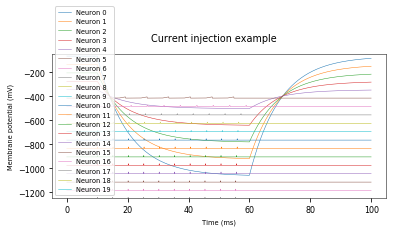

In [22]:
Figure(
        Panel(vm, y_offset=-10 * mV, xticks=True, yticks=True,
              xlabel="Time (ms)", ylabel="Membrane potential (mV)",
              ylim=(-1250, -50)),
        title="Current injection example"
)

In [27]:
print (vm)

[[  -65.          -135.          -205.         ..., -1255.         -1325.
  -1395.        ]
 [  -65.          -135.          -205.         ..., -1255.         -1325.
  -1395.        ]
 [  -65.          -135.          -205.         ..., -1255.         -1325.
  -1395.        ]
 ..., 
 [  -83.37401635  -149.50580238  -215.63758841 ..., -1255.         -1325.
  -1395.        ]
 [  -83.32819586  -149.46962831  -215.61106076 ..., -1255.         -1325.
  -1395.        ]
 [  -83.28248964  -149.43354445  -215.58459926 ..., -1255.         -1325.
  -1395.        ]] mV
